**Foundations of Investment Analysis**, Bates, Boyer, Fletcher

# Example Chater 9: Simulating Returns
In this notebook we simulate the returns of a portfolio to illustrate the relation between independence and diversification.

### Imports and Setup

In [1]:
# import packages
# Load in simple_finance.py from the GitHub repository
!curl -O https://raw.githubusercontent.com/boyerb/Investments/master/functions/simple_finance.py
# import the functions from the file we just downloaded
import simple_finance as sf
import numpy as np
import matplotlib.pyplot as plt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6232  100  6232    0     0  20436      0 --:--:-- --:--:-- --:--:-- 20500


### Specify Base Parameters
Specify the number of stocks and the number of months to simulate. Increasing $N$ enhances diversification and increasing the number of months decreasings sampling error.  

In [2]:
N = 10 # number of stocks
M = 60 # number of months

### Simulate Returns for the Tanget Portfolio
We first specify the expected return and volatility of the tangent portfolio.  When then simulate returns from the normal distribution. To simulate returns we access the `random` module in the numpy library. A module is a namespace in Python that organizes classes, functions, and objects. Within this module we use the `normal` function to generate random numbers.  If you want, you can include code to plot a histogram of the simulated returns by asking an AI assistant such as Chat GPT or Gemini.

In [3]:
mu_T = 0.0080  # expected return is 80 bps per month, or 9.6% annualized
var_T = 0.0036  # variance is 36 bps per month or 432 bps annualized
sigma_T = np.sqrt(var_T)  # volatility is 600 bps per month or 20.8% annualized
T_returns = np.random.normal(mu_T, sigma_T, M) # simulate returns

### Simulate betas and error terms
We have two options here to create betas.  In the first option betas are set to be the same number across firms, given by the parameter `beta_choice`.  In the second option betas are selected at random from a uniform distribution with a lower bound of 0.25 and an upper bound of 1.75. BY default, the second option is commented out.



In [4]:
# Option 1: Make all betas the same
beta_choice = 2
betas=np.ones(N) * beta_choice
# Option 2: Select N random betas uniformily distributed between 0.25 and 1.75
#mean_beta = 1.0
#betas = np.random.uniform(mean_beta - 0.75, mean_beta + 0.75, N)


### Simulate the Stock Returns
We simulate stock returns as \\

$r_i-r_f=\beta_ir_T+z_i$ \\

where $r_i-r_f$ denotes the exess return for stock $i$, $\beta_i$ is the beta, $r_T$ is the return on the tangent portfolio, and $z_T$ is the idiosyncratic shock. The variables $r_i$, $r_T$, and $z_i$ vary each period, while $r_f$ and $\beta_i$ are constants. We begin this block by specifying the volatility of the idiosyncratic shocks, stored in the array variable `z_vol`.   The variance of these shocks, or volatility squared, represents the **idiosyncratic risk** of the firm's equity. The volatilities are chosen from a random uniform distribution from 0.05 to 0.15, and there are $N$ of them, one for each firm. The variance of $\beta_ir_T$ represents the **systematic risk**.

We then simulate the stock returns in a loop.  We first create an empty "container" to collect results using the command `excess_returns = np.empty((M, N))`. This container is a 2-dimensional Numpy Array, similar to a matrix, or block with rows and columns.  Python uses *zero-based indexing* rather than *one-based indexing*. This means that the first row or column of an array is `0` rather than `1`. This is somewhat counter-intuitive but has logical and practical reasons rooted in computer science.  If a block of data has `x` rows and `y` columns, then the rows are indexed as `0,1,2,...x-1`, and the columns are indexed as `0,1,2,...,y-1`.   

 We then initiate a loop over the index $i$. The command "`for i in range(N):`" implies we will run the loop for every value of `i` from `0` to `i-1`, again becasue Python uses zero-based indexing. Within this loop for stock $i$, the first thing we do is simulate an array of idiosyncratic shocks, one for each month. We assume idiosyncratic shocks are normally distributed and again use the `normal` function provided by the `random` NumPy module to simulate these shocks. The number of shocks is specified by `M` (one for each month), the mean is zero, and the standard deviation is given by the element of  `z_std_devs` for stock $i$, `z_std_devs[i]`. We then create an array of excess returns as in the equation above.  We multiply the array of tangent portfolio returns by the beta for stock $i$ amd then add to this the array of idiosyncratic shocks.  This produces a return array of length `M` and includes a return for each month. We store this array in the `excess_returns` container. The code `excess_returns[:, i]` implies how we will store this array in the container. The colon `:` implies we will use up all rows of the container, and `i` implies we will use the $i^{th}$ column. Hence the array of monthly returns for stock $i$ will be stored as column $i$ in the container `excess_returns`.   

In [10]:
# Specify standard deviation of idiosyncratic shocks for each stock
z_vol = np.random.uniform(0.05, 0.15, N)

# Simulate stock returns
excess_returns = np.empty((M, N))
for i in range(N):
    z_i = np.random.normal(0, z_vol[i], M)
    excess_returns[:, i] = betas[i] * T_returns + z_i

print(excess_returns)

[[-2.34758876e-01 -2.91662191e-01 -1.91887790e-01 -2.72240668e-01
  -3.54821277e-01 -1.76736689e-01 -9.67305186e-02 -2.38662505e-01
  -1.89546696e-01 -1.56914877e-01]
 [ 8.09399153e-02  1.67255264e-01  2.83718984e-01  1.57925232e-01
   1.20425957e-01  1.25816998e-01  9.20920327e-02  2.34190388e-01
   2.53822997e-01  1.03617295e-01]
 [-1.19938184e-01 -4.11809333e-02 -1.66448701e-01 -8.71785779e-02
  -1.95526305e-01 -1.94391938e-01 -3.43618521e-01 -2.84292823e-01
  -1.79745135e-01 -1.72346776e-01]
 [ 6.49108863e-03 -4.16070343e-02 -1.15188347e-02  5.52855276e-02
   2.64444450e-02  1.09407794e-01  1.32790330e-02 -2.83985472e-03
  -7.93636060e-02 -1.13743507e-02]
 [ 1.46542918e-01 -4.85777396e-02  1.69297999e-01 -1.93395686e-01
  -9.83025139e-02  8.00094656e-02  2.01478812e-01 -5.31889196e-02
  -3.87917278e-03  9.19669265e-02]
 [-1.33593023e-01 -1.64633860e-02 -7.04605693e-02 -5.65309768e-03
   2.07095948e-02 -1.20753011e-01 -1.70021265e-02 -1.30692344e-01
  -1.97204449e-01 -1.97396502e-02

### Specify Portfolio Weights and Create Portfolio Returns
We now specify the weights for our portfolio. Again, here we have two options. The first option is the specify an equally-weighted portfolio. We create a NumPy array of ones of dimension $N$, and divide by $N$. Hence, all weights are simply $1/N$. The second option is to specify random portfolio weights betwen 0 and 1 that sum to one. We first create a random array of $N$ numbers using the `rand` function provided by the `random` module, and then we divide all of these by the sum so to create an array of weights that sums to one. The second option helps illustrate that the intuition gained from this example is not unique to equally-weighted portfolios. By default, Option #2 is commented out.    
We then use our weights to create portfolio returns for each month. Portfolio returns are an inner product (sumproduct in Excel) of weights and the returns of each individual asset in the portfolio. We can perform this innerproduct for every month using one line of code: `excess_returns @ weights`. The array `excess_returns` is like an $M \times N$ matrix and `weights` is like an $N \times 1$ vector. The symbol `@` represents matrix multiplication. In this operation we take each row of `excess_returns`(the returns for all stocks for a given month) and take an inner product with weights. The array `portfolio_returns` is then an `M \times 1` array that gives us the portfolio return each month.   

In [6]:
# Option 1: Create equally weighted portfolio
weights = np.ones(N) / N

# Option 2: Create random portfolio weights between 0 and 1 that sum to 1
#weights = np.random.rand(N)  # N random values between 0 and 1
#weights /= weights.sum()  # Normalize so they sum to 1

portfolio_returns = excess_returns @ weights

### Plot the Portfolio Returns (Black) and the Individual Stock Returns
Here we plot the simulated returns.  Use an AI assistant such as Chat GPT or Gemeni to learn more about each line of code as desired.  

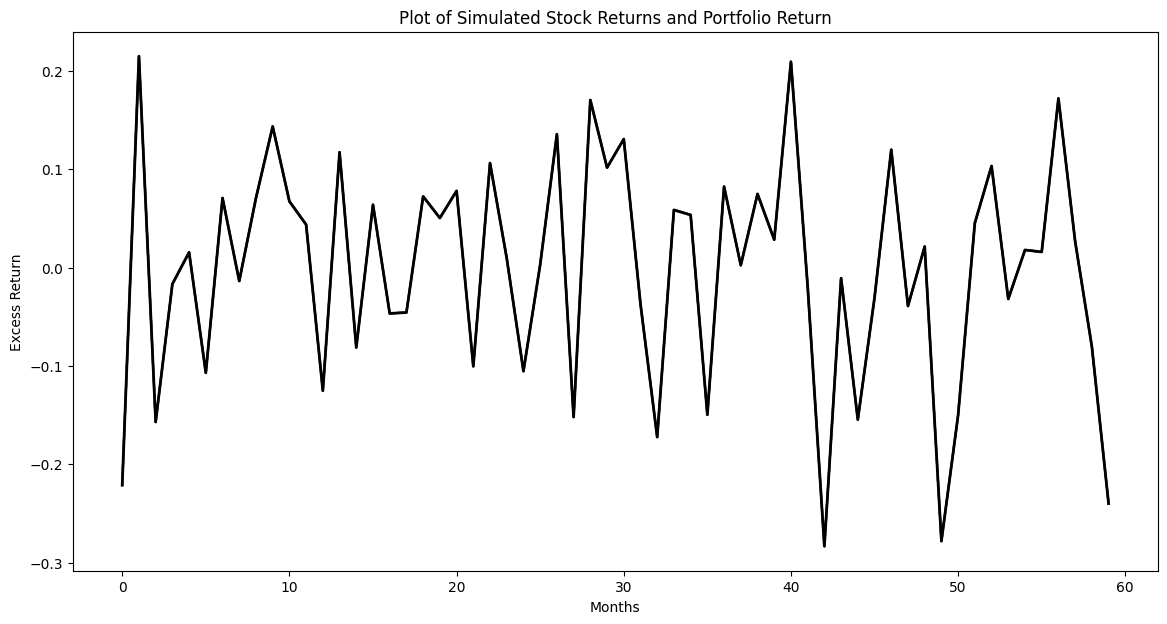

In [7]:
plt.figure(figsize=(14, 7))
for i in range(N):
    plt.plot(excess_returns[:, i], alpha=0.5)

plt.plot(portfolio_returns, color='black', linewidth=2)
plt.title('Plot of Simulated Stock Returns and Portfolio Return')
plt.xlabel('Months')
plt.ylabel('Excess Return')
plt.show()

### Calculate the Variance of the Portfolio Return
Here we calculate the variance of the portfolio return in two ways.  First we simply use the NumPy `variance` function.  We then calcaute this variance using the idea that idiosyncratic variance has been diversified away. The variance of the portfolio is

$Var[r_P]=\beta_{pT}^2Var[r_T]+Var[z_p]$

where $\beta_{pT}$ is the beta of the portfolio relative to the tangent portfolio. The inner-product portfolio rule applies to portfolio betas, implying that the beta of the portfolio is an inner-product of individual asset betas and portfolio weights.  The important idea to understand is that with many stocks, $Var[z_p]$ is essentially zero.  Idiosyncratic risk gets diversifed away when there are many stocks in the portfolio.

In [8]:
# Calculate the variance of the portfolio return
portfolio_variance = np.var(portfolio_returns)
print(f'Variance of the Portfolio Return: {portfolio_variance:.6f}')
beta_pT = sf.slope(portfolio_returns,T_returns)
var_T = np.var(T_returns)
portfolio_systematic_risk = (beta_pT **2) * var_T  # **2 means "raise to the power of 2"
print(f'Portfolio Systematic Risk : {portfolio_systematic_risk:.6f}')
portfolio_idiosyncratic_risk = portfolio_variance - portfolio_systematic_risk
print(f'Idiosyncratic Risk: {portfolio_idiosyncratic_risk:.6f}')

Variance of the Portfolio Return: 0.013400
Portfolio Systematic Risk : 0.000837
Idiosyncratic Risk: 0.012562
